## 0.Importing Dependencies.

In [ ]:
#!pip install tensorflow tensorflow-gpu pandas matplotlib sklearn

In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Toxic_Comment_Classification/train.csv")

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


## 1.Preprocess the data using tf.

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
X = df["comment_text"]
y = df[df.columns[2:]].values

In [ ]:
MAX_FEATURES = 200000 # number odf words in the vocab

In [ ]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode="int")

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
vectorizer('Hello world, I am Azeem')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263,   8,  74,   1])>

In [ ]:
vectorized_text = vectorizer(X.values)

In [ ]:
len(X)

159571

In [ ]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [ ]:
#MCSHBAP - map,cache,shuffle,batch,prefetch
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [ ]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [ ]:
batch_X

array([[    11,    267,      3, ...,      0,      0,      0],
       [ 17924,     49,      7, ...,      0,      0,      0],
       [     8,    268,     48, ...,      0,      0,      0],
       ...,
       [    65, 190722,   2366, ...,      0,      0,      0],
       [   171,      1,      8, ...,      0,      0,      0],
       [  1559,     28,     22, ...,      0,      0,      0]])

In [ ]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [ ]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [ ]:
train_generator = train.as_numpy_iterator()

In [ ]:
train_generator.next()

(array([[   90,   533,     9, ...,     0,     0,     0],
        [    8,   910,    29, ...,     0,     0,     0],
        [    2,  1218,     7, ...,     0,     0,     0],
        ...,
        [  113,   204,    41, ...,     0,     0,     0],
        [ 2070, 21355,  1364, ...,     0,     0,     0],
        [  917,  1102,    46, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

## 2.Creating Sequential model.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [ ]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.compile(loss="BinaryCrossentropy", optimizer = 'Adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                      

In [ ]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
6981/6981 [==============================] - 649s 93ms/step - loss: 0.0469 - val_loss: 0.0421
Epoch 2/10
6981/6981 [==============================] - 654s 94ms/step - loss: 0.0403 - val_loss: 0.0368
Epoch 3/10
6981/6981 [==============================] - 655s 94ms/step - loss: 0.0364 - val_loss: 0.0332
Epoch 4/10
6981/6981 [==============================] - 645s 92ms/step - loss: 0.0329 - val_loss: 0.0283
Epoch 5/10
6981/6981 [==============================] - 656s 94ms/step - loss: 0.0293 - val_loss: 0.0256
Epoch 6/10
6981/6981 [==============================] - 651s 93ms/step - loss: 0.0266 - val_loss: 0.0233
Epoch 7/10
6981/6981 [==============================] - 655s 94ms/step - loss: 0.0239 - val_loss: 0.0207
Epoch 8/10
6981/6981 [==============================] - 646s 92ms/step - loss: 0.0210 - val_loss: 0.0184
Epoch 9/10
6981/6981 [==============================] - 646s 93ms/step - loss: 0.0192 - val_loss: 0.0146
Epoch 10/10
6981/6981 [==============================] 

In [ ]:
history.history

{'loss': [0.04685663804411888,
  0.04031959921121597,
  0.03636099770665169,
  0.03292672336101532,
  0.029288746416568756,
  0.026611996814608574,
  0.023850301280617714,
  0.021016735583543777,
  0.019204894080758095,
  0.017295200377702713],
 'val_loss': [0.04213874042034149,
  0.0367625392973423,
  0.03321169689297676,
  0.028293082490563393,
  0.025629261508584023,
  0.023315925151109695,
  0.02065332978963852,
  0.018404273316264153,
  0.014641493558883667,
  0.014254356734454632]}

In [ ]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

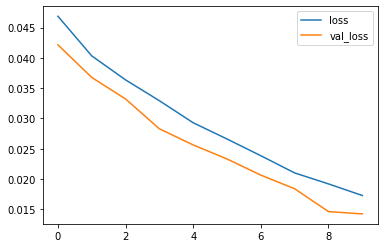

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

## 3.Making predictions.

In [ ]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [ ]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
batch = test.as_numpy_iterator().next()

In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
res = model.predict(np.expand_dims(input_text, 0))

In [ ]:
res

array([[0.99799865, 0.45143175, 0.9860541 , 0.06246727, 0.8693797 ,
        0.07079804]], dtype=float32)

## 3.Evaluating model.

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.929789662361145, Recall:0.9255800843238831, Accuracy:0.505516529083252


In [ ]:
!pip install gradio jinja2

## 4.Test and Gradio.

In [ ]:
import tensorflow as tf
import gradio as gr

In [ ]:
model_save_name = 'toxicity.h5'
path = F"/content/drive/MyDrive/Colab Notebooks/Toxic_Comment_Classification/{model_save_name}"
model.save(path)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Toxic_Comment_Classification//toxicity.h5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Toxic_Comment_Classification/toxicity.h5')

In [ ]:
input_str = vectorizer("Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,'")

In [ ]:
input_str = vectorizer("Thank you for understanding. I think very highly of you and would not revert without discussion.")

In [ ]:
res = model.predict(np.expand_dims(input_str,0))

In [ ]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
res

array([[1.2120821e-10, 0.0000000e+00, 6.2814428e-17, 0.0000000e+00,
        2.3148479e-15, 0.0000000e+00]], dtype=float32)

In [ ]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [ ]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [ ]:
interface.launch(share=True,debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://20942.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
